In [1]:
# DATA UNDERSTANDING
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]



In [3]:
df.info()
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df.head(5)
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GT      100 non-null    object 
 1   DT      3 non-null      float64
 2   KV      100 non-null    object 
 3   KT      100 non-null    object 
 4   M1      100 non-null    float64
 5   M2      100 non-null    float64
 6   M3      100 non-null    float64
 7   NT      100 non-null    object 
 8   NGHE    100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [6]:
df.head()

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


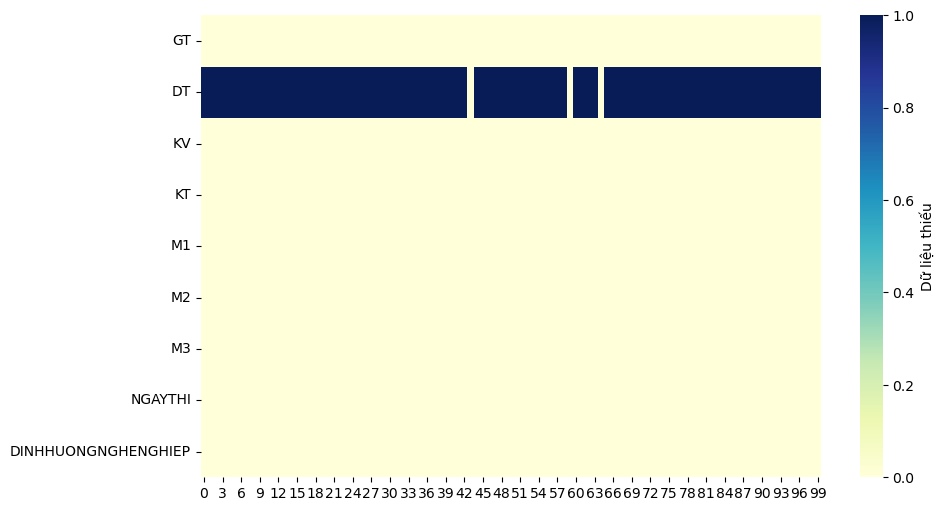

In [8]:
#tìm dữ liệu ở trường nào bị thiếu

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

# dựa vào biểu đồ ta thấy ở trường DT bị thiếu

In [11]:

df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17004\153995448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DT'].fillna('KINH', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17004\153995448.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17004\15

In [ ]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df

,GT,DT,KV,KT,M1,M2,M3,NGAYTHI,DINHHUONGNGHENGHIEP,TBM,XL,NHOM,PLUS
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3,0.0
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3,0.0


In [ ]:
#Sinh viên tự làm tạo cột MaxM = giá trị lớn nhất của (M1,M2,M3)
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3

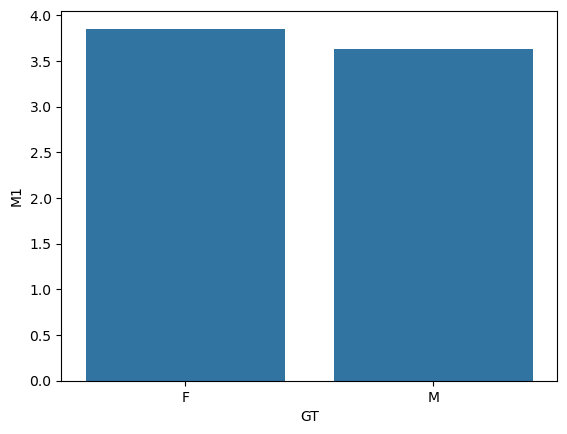

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()

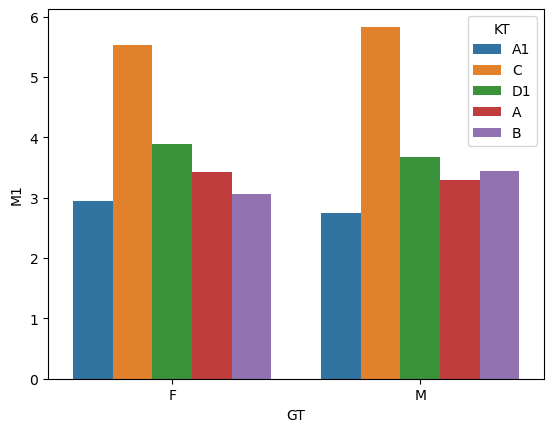

In [4]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()

In [9]:
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...
95,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No
97,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No


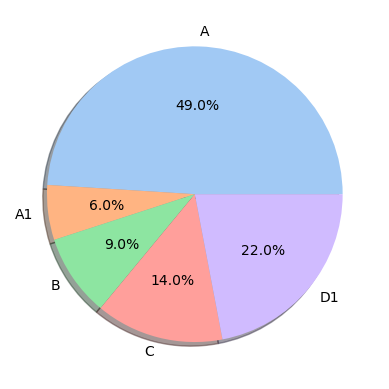

In [7]:
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

In [8]:
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...
95,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No
97,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No
